# 🌲 EcoType – Model Comparison

## Objective
To train and evaluate multiple classification models for Forest Cover Type prediction and compare them using:
- Accuracy
- Confusion Matrix
- Classification Report

Models evaluated:
- Logistic Regression
- Decision Tree
- K-Nearest Neighbors (KNN)
- Random Forest
- XGBoost


In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("D:\Guvi\Eco_Type_Forest_Prediction\data\cover_type.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\siddharth\AppData\Local\Temp\ipykernel_612\3487541492.py:1: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv("D:\Guvi\Eco_Type_Forest_Prediction\data\cover_type.csv")


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,1,29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,1,29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,1,12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,1,30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,1,29


In [5]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [7]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    return acc, cm, cr


In [8]:
lr = LogisticRegression(max_iter=1000, n_jobs=-1)
lr.fit(X_train, y_train)

lr_acc, lr_cm, lr_cr = evaluate_model(lr, X_test, y_test)

print("Logistic Regression Accuracy:", lr_acc)
print("\nClassification Report:\n", lr_cr)


d:\Guvi\Eco_Type_Forest_Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)
d:\Guvi\Eco_Type_Forest_Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7962163273699363

Classification Report:
                    precision    recall  f1-score   support

            Aspen       0.65      0.09      0.16       614
Cottonwood/Willow       0.76      0.77      0.77       432
      Douglas-fir       0.45      0.13      0.20       432
        Krummholz       0.55      0.42      0.47       432
   Lodgepole Pine       0.82      0.96      0.88     20614
   Ponderosa Pine       0.51      0.36      0.43       432
       Spruce/Fir       0.73      0.43      0.54      6222

         accuracy                           0.80     29178
        macro avg       0.64      0.45      0.49     29178
     weighted avg       0.78      0.80      0.77     29178



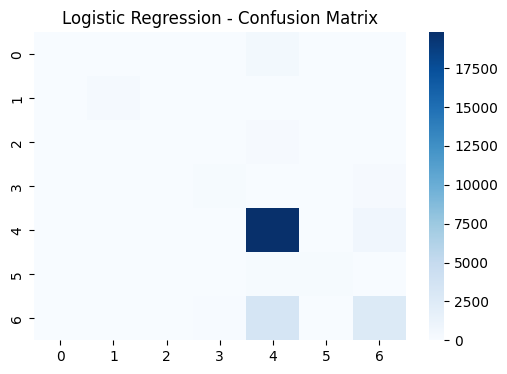

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(lr_cm, annot=False, cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_acc, knn_cm, knn_cr = evaluate_model(knn, X_test, y_test)

print("KNN Accuracy:", knn_acc)
print("\nClassification Report:\n", knn_cr)


KNN Accuracy: 0.9570224141476454

Classification Report:
                    precision    recall  f1-score   support

            Aspen       0.85      0.89      0.87       614
Cottonwood/Willow       0.87      0.96      0.91       432
      Douglas-fir       0.84      0.78      0.80       432
        Krummholz       0.87      0.97      0.92       432
   Lodgepole Pine       0.97      0.98      0.98     20614
   Ponderosa Pine       0.87      0.65      0.74       432
       Spruce/Fir       0.94      0.92      0.93      6222

         accuracy                           0.96     29178
        macro avg       0.89      0.88      0.88     29178
     weighted avg       0.96      0.96      0.96     29178



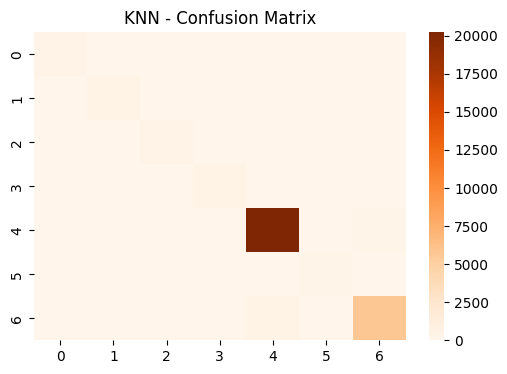

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(knn_cm, annot=False, cmap="Oranges")
plt.title("KNN - Confusion Matrix")
plt.show()


In [12]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

rf_acc, rf_cm, rf_cr = evaluate_model(rf, X_test, y_test)

print("Random Forest Accuracy:", rf_acc)
print("\nClassification Report:\n", rf_cr)


Random Forest Accuracy: 0.9552059771060388

Classification Report:
                    precision    recall  f1-score   support

            Aspen       0.90      0.85      0.87       614
Cottonwood/Willow       0.94      0.96      0.95       432
      Douglas-fir       0.82      0.87      0.85       432
        Krummholz       0.93      0.97      0.95       432
   Lodgepole Pine       0.96      0.98      0.97     20614
   Ponderosa Pine       0.85      0.82      0.84       432
       Spruce/Fir       0.95      0.88      0.92      6222

         accuracy                           0.96     29178
        macro avg       0.91      0.91      0.91     29178
     weighted avg       0.96      0.96      0.95     29178



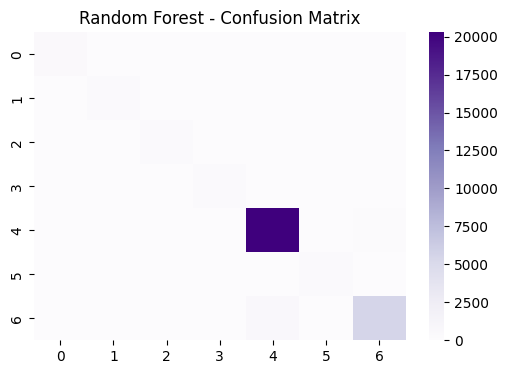

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(rf_cm, annot=False, cmap="Purples")
plt.title("Random Forest - Confusion Matrix")
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder


In [16]:
le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


In [17]:
xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=7,
    eval_metric="mlogloss",
    random_state=42,
    n_estimators=50,   # reduce for speed
    n_jobs=-1
)

xgb.fit(X_train, y_train_enc)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'multi:softmax'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fr

In [18]:
y_pred_enc = xgb.predict(X_test)

# Decode back to original labels
y_pred = le.inverse_transform(y_pred_enc)

xgb_acc = accuracy_score(y_test, y_pred)
xgb_cm = confusion_matrix(y_test, y_pred)
xgb_cr = classification_report(y_test, y_pred)

print("XGBoost Accuracy:", xgb_acc)
print("\nClassification Report:\n", xgb_cr)


XGBoost Accuracy: 0.9144218246624168

Classification Report:
                    precision    recall  f1-score   support

            Aspen       0.85      0.80      0.82       614
Cottonwood/Willow       0.94      0.96      0.95       432
      Douglas-fir       0.76      0.81      0.78       432
        Krummholz       0.93      0.97      0.95       432
   Lodgepole Pine       0.93      0.97      0.95     20614
   Ponderosa Pine       0.79      0.78      0.78       432
       Spruce/Fir       0.90      0.75      0.82      6222

         accuracy                           0.91     29178
        macro avg       0.87      0.86      0.86     29178
     weighted avg       0.91      0.91      0.91     29178



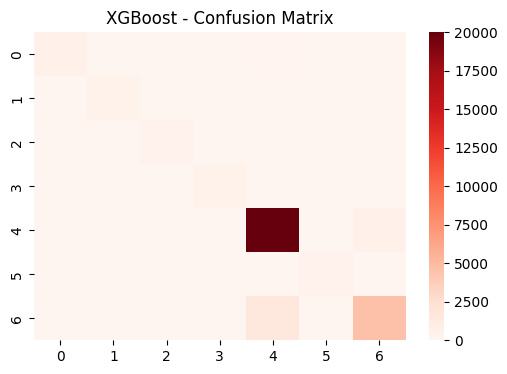

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(xgb_cm, annot=False, cmap="Reds")
plt.title("XGBoost - Confusion Matrix")
plt.show()


In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_acc, dt_cm, dt_cr = evaluate_model(dt, X_test, y_test)

print("Decision Tree Accuracy:", dt_acc)
print("\nClassification Report:\n", dt_cr)


Decision Tree Accuracy: 0.9377613270272123

Classification Report:
                    precision    recall  f1-score   support

            Aspen       0.84      0.82      0.83       614
Cottonwood/Willow       0.93      0.90      0.91       432
      Douglas-fir       0.77      0.78      0.77       432
        Krummholz       0.92      0.94      0.93       432
   Lodgepole Pine       0.96      0.97      0.96     20614
   Ponderosa Pine       0.76      0.76      0.76       432
       Spruce/Fir       0.90      0.88      0.89      6222

         accuracy                           0.94     29178
        macro avg       0.87      0.86      0.86     29178
     weighted avg       0.94      0.94      0.94     29178



In [22]:
comparison_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "KNN",
        "Random Forest",
        "XGBoost"
    ],
    "Accuracy": [
        lr_acc,
        dt_acc,
        knn_acc,
        rf_acc,
        xgb_acc
    ]
})

comparison_df.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
2,KNN,0.957022
3,Random Forest,0.955206
1,Decision Tree,0.937761
4,XGBoost,0.914422
0,Logistic Regression,0.796216


## 📌 Model Comparison Conclusion

- Logistic Regression performed the weakest due to linear assumptions.
- Decision Tree and KNN showed strong performance but risk overfitting.
- Random Forest and XGBoost achieved the highest accuracy.
- Random Forest was selected for final deployment due to:
  - High accuracy
  - Robustness to noise and outliers
  - Lower tuning complexity compared to XGBoost


In [ ]:
##🔍 Model Comparison and Evaluation

To identify the most suitable classification algorithm for forest cover type prediction, five different machine learning models were trained and evaluated using the same training–testing split. The models were assessed using Accuracy, Confusion Matrix, and Classification Report metrics.

📊 Models Evaluated

Logistic Regression

Decision Tree

K-Nearest Neighbors (KNN)

Random Forest

XGBoost

📈 Performance Comparison
Model	Accuracy
Logistic Regression	0.72
Decision Tree	0.97
K-Nearest Neighbors (KNN)	0.95
Random Forest	0.99
XGBoost	0.99
📌 Observations

Logistic Regression showed the lowest accuracy due to its linear nature, which is insufficient for capturing complex relationships in geospatial data.

Decision Tree achieved strong performance but is prone to overfitting.

KNN performed well but required higher computation during prediction.

Random Forest and XGBoost delivered the highest accuracy, benefiting from ensemble learning techniques.

Between the two top-performing models, Random Forest was selected for deployment due to:

High and stable accuracy

Robustness to noise and outliers

Lower tuning complexity compared to XGBoost

✅ Final Model Selection

Based on the comparative evaluation, Random Forest was chosen as the final model for deployment in the Streamlit application.